# Notebook preparation

In [1]:
import datetime
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.dates import DateFormatter
from fbprophet import Prophet

# Data analysis

In [2]:
infos = pd.read_csv('../data/infos.csv', sep='|')
infos.head()

,itemID,simulationPrice,promotion
0,1,3.43,NaN
1,2,9.15,NaN
2,3,14.04,NaN
3,4,14.10,NaN
4,5,7.48,NaN


In [3]:
items = pd.read_csv('../data/items.csv', sep='|')
items.head()

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04


In [4]:
orders = pd.read_csv('../data/orders.csv', sep='|')
orders['time'] = pd.to_datetime(orders.time)
orders.head()

,time,transactID,itemID,order,salesPrice
0,2018-01-01 00:01:56,2278968,450,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47
3,2018-01-01 00:09:24,2278968,450,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19


In [5]:
# change date to aggregate on daily basis
orders['time'] = orders['time'].dt.strftime('%Y-%m-%d')

# aggregate 'order' and 'salesPrice' per product 
agg_orders = orders.groupby('itemID', as_index=False).agg({'order': 'sum', 'salesPrice': 'sum'})

# order by 'order'
top_order_number = agg_orders.sort_values(by=['order'], ascending=False)
top_order_number = top_order_number.reset_index(drop=True)

# order by 'salesPrice'
top_sales_price = agg_orders.sort_values(by=['salesPrice'], ascending=False)
top_sales_price = top_sales_price.reset_index(drop=True)

In [6]:
# most ordered products
top_order_number.head()

,itemID,order,salesPrice
0,7789,12184,100413.99
1,5035,11908,369170.19
2,5117,9100,156487.53
3,4297,8675,29062.80
4,5039,8444,21543.41


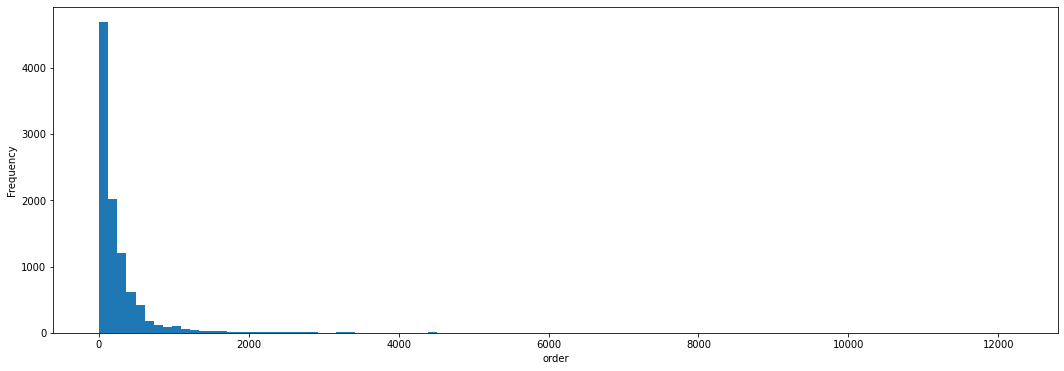

In [7]:
# 'order' distribution
plot = top_order_number['order'].plot(kind='hist', bins=100, figsize=(18, 6))
plot.set_xlabel('order')
plt.show()

In [8]:
# products with the highest revenue
top_sales_price.head()

,itemID,order,salesPrice
0,672,366,515476.81
1,320,662,504417.56
2,35,1508,502826.32
3,7625,304,433909.36
4,4965,1470,410743.93


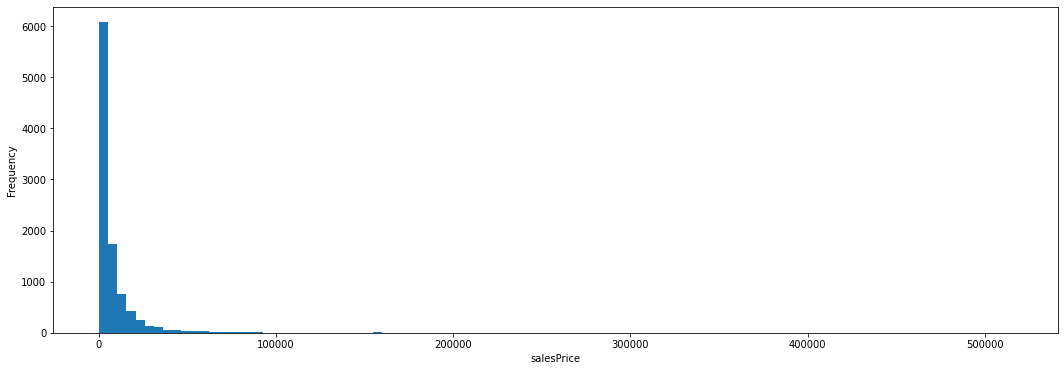

In [9]:
# 'order' distribution
plot = top_sales_price['salesPrice'].plot(kind='hist', bins=100, figsize=(18, 6))
plot.set_xlabel('salesPrice')
plt.show()

In [10]:
# aggregate 'order' and 'salesPrice' per day per product
agg_orders = orders.groupby(['itemID', 'time']).agg({'order': 'sum', 'salesPrice': 'sum'})

# aggregate 'order' and 'salesPrice' per week per product
orders_weekly = orders.copy()
orders_weekly['week'] = orders_weekly['time'].astype(np.datetime64).dt.week
agg_orders_weekly = orders_weekly.groupby(['itemID', 'week']).agg({'order': 'sum', 'salesPrice': 'sum'})

# aggregate 'order' and 'salesPrice' per day
agg_orders_all = orders.groupby(['time']).agg({'order': 'sum', 'salesPrice': 'sum'})

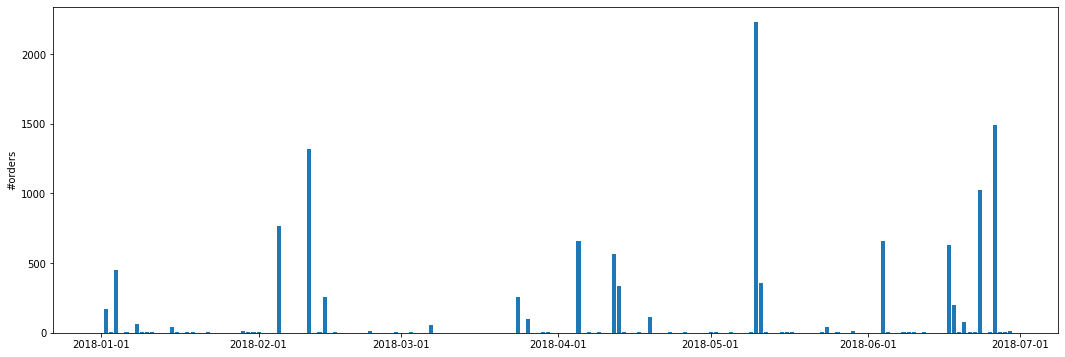

In [11]:
# number of orders per day (examplary product)
item = agg_orders.loc[7789]
idx = pd.date_range('2018-01-01', '2018-06-29')
item.index = pd.DatetimeIndex(item.index)
item = item.reindex(idx, fill_value=0)
item.index = pd.to_datetime(item.index)

# plot figure
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(item.index.values, item['order'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('#orders')
plt.show()

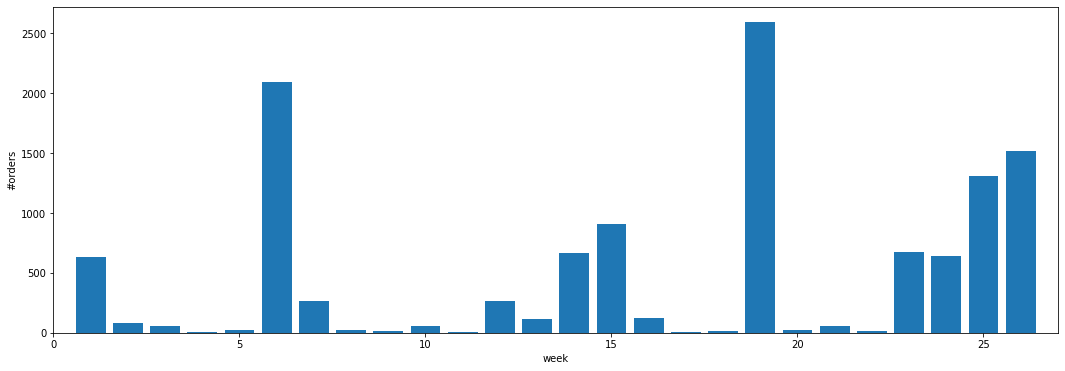

In [12]:
# number of orders per week (examplary product)
item = agg_orders_weekly.loc[7789]

# plot figure
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(item.index.values, item['order'])
ax.set_xlim(0, 27)
ax.set_ylabel('#orders')
ax.set_xlabel('week')
plt.show()

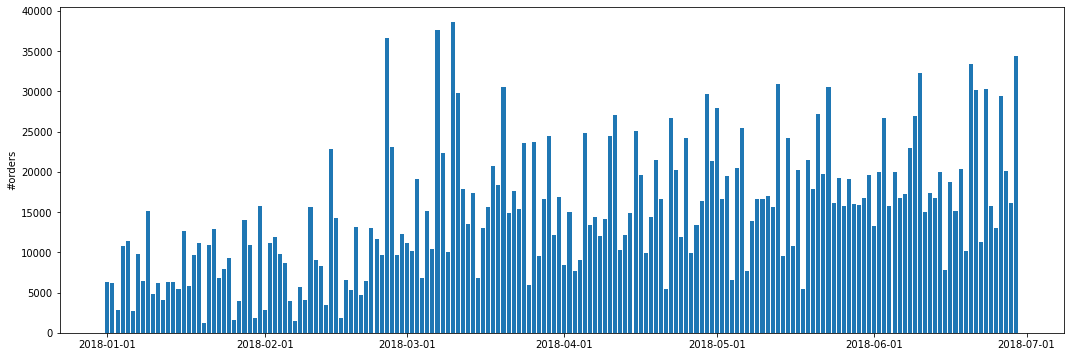

In [13]:
# number of orders per day (all products)
item = agg_orders_all.copy()
idx = pd.date_range('2018-01-01', '2018-06-29')
item.index = pd.DatetimeIndex(item.index)
item = item.reindex(idx, fill_value=0)
item.index = pd.to_datetime(item.index)

# plot figure
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(item.index.values, item['order'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('#orders')
plt.show()

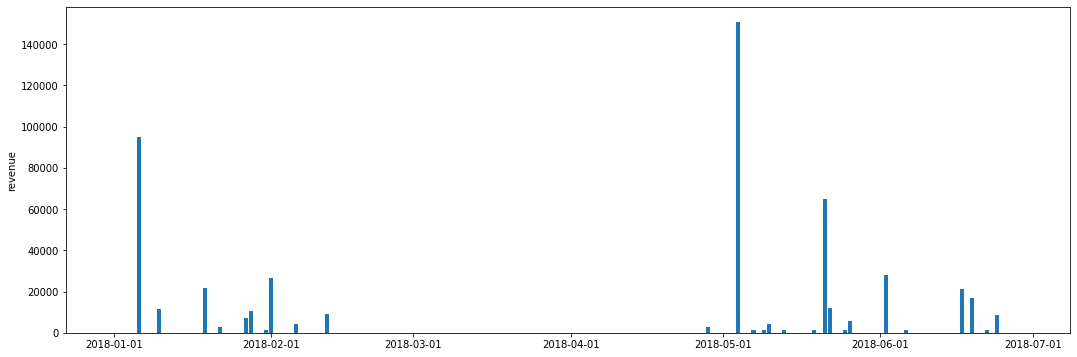

In [14]:
# revenue per day (examplary product)
item = agg_orders.loc[672]
idx = pd.date_range('2018-01-01', '2018-06-29')
item.index = pd.DatetimeIndex(item.index)
item = item.reindex(idx, fill_value=0)
item.index = pd.to_datetime(item.index)

# plot figure
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(item.index.values, item['salesPrice'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('revenue')
plt.show()

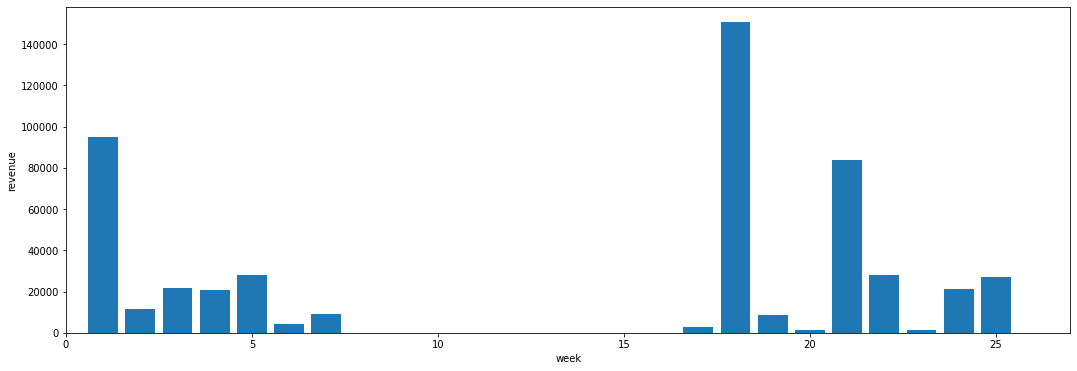

In [15]:
# revenue per week (examplary product)
item = agg_orders_weekly.loc[672]

# plot figure
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(item.index.values, item['salesPrice'])
ax.set_xlim(0, 27)
ax.set_ylabel('revenue')
ax.set_xlabel('week')
plt.show()

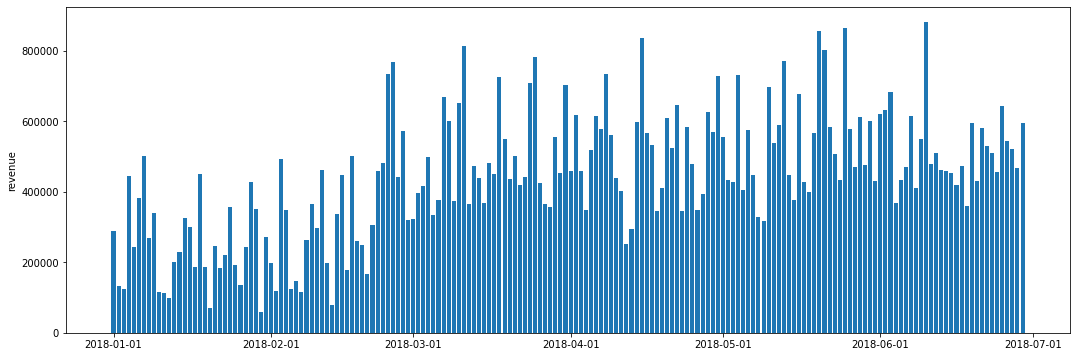

In [16]:
# revenue per day (all products)
item = agg_orders_all.copy()
idx = pd.date_range('2018-01-01', '2018-06-29')
item.index = pd.DatetimeIndex(item.index)
item = item.reindex(idx, fill_value=0)
item.index = pd.to_datetime(item.index)

# plot figure
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(item.index.values, item['salesPrice'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('revenue')
plt.show()

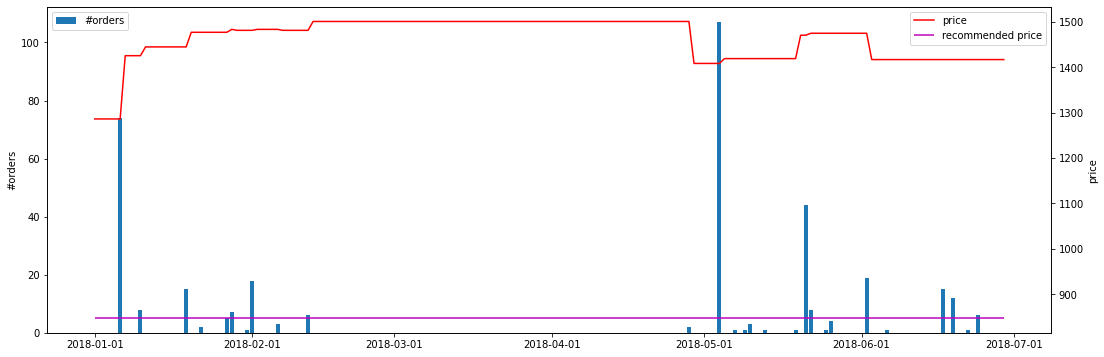

In [17]:
# sales price for a single product over time (examplary product)
item_id = 672
item = agg_orders.loc[item_id]
idx = pd.date_range('2018-01-01', '2018-06-29')
item.index = pd.DatetimeIndex(item.index)
item = item.reindex(idx, fill_value=0)
item.index = pd.to_datetime(item.index)
item['price'] = item['salesPrice'] / item['order']
item = item.fillna(method='bfill')
item = item.fillna(method='ffill')

# plot figure
fig, ax1 = plt.subplots(figsize=(18, 6), sharex=True)
ax1.bar(item.index.values, item['order'], label='#orders')
ax2 = ax1.twinx()
ax2.plot(item.index.values, item['price'], 'r', label='price')
ax2.hlines(items[items['itemID'] == item_id].recommendedRetailPrice, 
           datetime.datetime(2018, 1, 1), 
           datetime.datetime(2018, 6, 29), 'm', label='recommended price')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.set_ylabel('#orders')
ax2.set_ylabel('price')
ax1.legend(loc='upper left')
ax2.legend()
plt.show()

# Time series forcasting with Prophet

In [18]:
# data preparation (daily forcast)
item = agg_orders.loc[7789]
idx = pd.date_range('2018-01-01', '2018-06-29')
item.index = pd.DatetimeIndex(item.index)
item = item.reindex(idx, fill_value=0)
item.index = pd.to_datetime(item.index)
item = item.reset_index()
item = item.drop(['salesPrice'], axis=1)
item.columns = ['ds', 'y']
item.head()

,ds,y
0,2018-01-01,0
1,2018-01-02,172
2,2018-01-03,4
3,2018-01-04,448
4,2018-01-05,2


In [19]:
# create and fit model
m1 = Prophet()
m1.fit(item)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


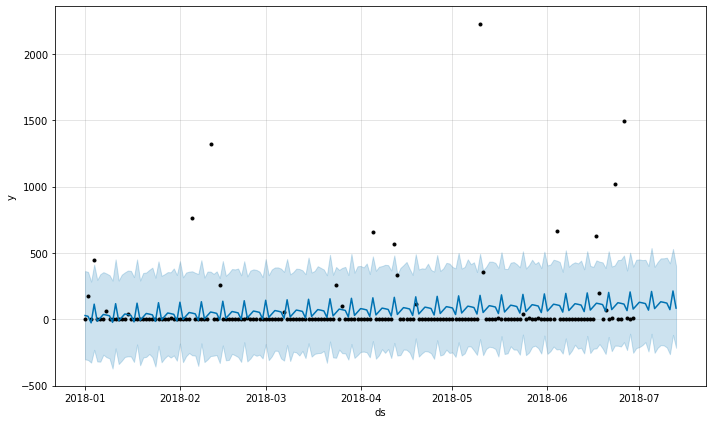

In [20]:
# make prediction for 14 days and plot result
future = m1.make_future_dataframe(periods=14)
forecast = m1.predict(future)
fig1 = m1.plot(forecast)

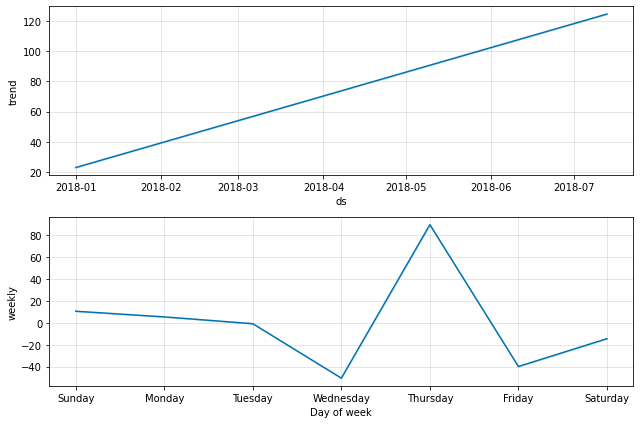

In [21]:
# plot prediction components
fig2 = m1.plot_components(forecast)

In [22]:
# data preparation (weekly forcast)
item = agg_orders_weekly.copy()
item = item.loc[7789]
idx = pd.RangeIndex(start=1, stop=27, step=1)
item = item.reindex(idx, fill_value=0)
date_idx = pd.date_range('2018-01-01', '2018-06-29', freq ='7D')
item.index = date_idx
item.index = pd.to_datetime(item.index)
item = item.reset_index()
item = item.drop(['salesPrice'], axis=1)
item.columns = ['ds', 'y']
item.head()

,ds,y
0,2018-01-01,629
1,2018-01-08,79
2,2018-01-15,54
3,2018-01-22,9
4,2018-01-29,27


In [23]:
m2 = Prophet()
m2.fit(item)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


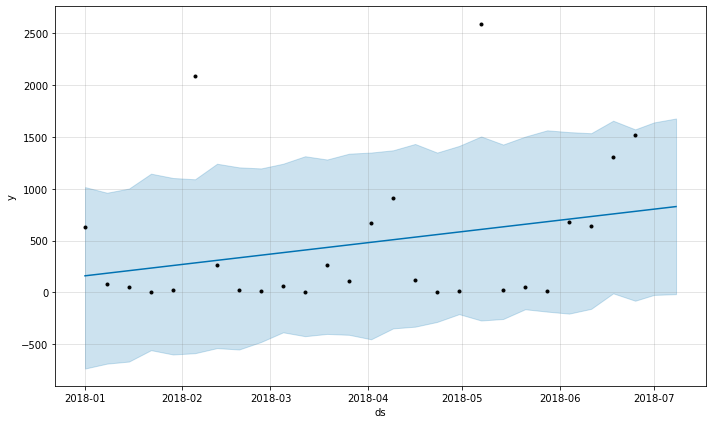

In [24]:
# make prediction for 2 weeks and plot result
future = m2.make_future_dataframe(periods=2, freq='W')
forecast = m2.predict(future)
fig1 = m2.plot(forecast)

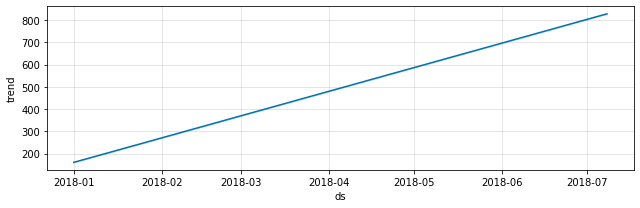

In [26]:
# plot prediction components
fig2 = m2.plot_components(forecast)

In [ ]:
# TODO: association rule mining (which products are purchased together?)